In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pieces = []
columns = ['name','sex','births']

for year in range(1880,2019):
    path = 'data/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
names.head(3)

name sex  births  year
0  Mary   F    7065  1880
1  Anna   F    2604  1880
2  Emma   F    2003  1880

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

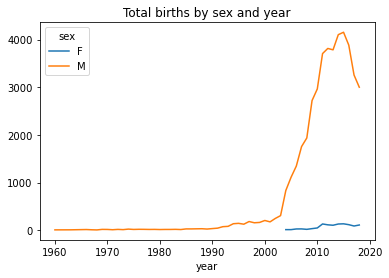

In [53]:
total_births = names[names['name']=='Ryder'].pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.plot(title='Total births by sex and year')

## Exercise one

Task: Randomly select 5 female and 5 male names (the program should do this for you) and plot the number of babies given these names from 1880-2010 on the same chart so that they can be compared+

In [3]:
all_names = names['name'].unique()
random_names = np.random.choice(all_names,5)

In [37]:


rnames = names[names.name.isin(random_names)]
rnames = rnames.groupby(['year','name']).agg('sum')
rnames.reset_index(inplace=True)
rnames_wide = rnames.pivot("year","name")
rnames_wide

births                             
name Huberta Maleana  Mercy Tairy Yvonnda
year                                     
1881     NaN     NaN    9.0   NaN     NaN
1882     NaN     NaN    7.0   NaN     NaN
1883     NaN     NaN    5.0   NaN     NaN
1884     NaN     NaN    5.0   NaN     NaN
1886     NaN     NaN    6.0   NaN     NaN
...      ...     ...    ...   ...     ...
2014     NaN     NaN  298.0   NaN     NaN
2015     NaN     NaN  276.0   NaN     NaN
2016     NaN     NaN  371.0   NaN     NaN
2017     NaN     NaN  376.0   NaN     NaN
2018     NaN     NaN  403.0   5.0     NaN

[130 rows x 5 columns]

<AxesSubplot:xlabel='year'>

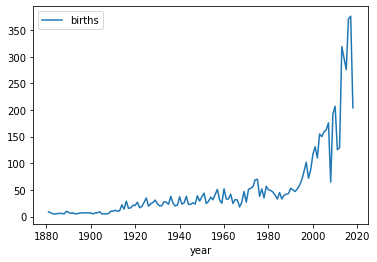

In [40]:
import seaborn as sns

sns.lineplot(data=rnames_wide)
